In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("HMEQ.csv", engine='python')
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df['JOB'].fillna('Other', inplace=True)
df.fillna(df.mean(), inplace=True)

In [6]:
df_dummy = pd.get_dummies(df)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [7]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis=1, inplace=False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (2623, 18)
train data Y size :  (2623,)
test data X size :  (1125, 18)
test data Y size :  (1125, 18)


In [11]:
gb_uncusomized = GradientBoostingClassifier(random_state=1234)
gb_uncusomized.fit(df_train_x, df_train_y);

print("Accuracy on training set ", gb_uncusomized.score(df_train_x, df_train_y))
print("Accuracy on test set ", gb_uncusomized.score(df_test_x, df_test_y))

Accuracy on training set  0.963400686237133
Accuracy on test set  0.9413333333333334


In [12]:
train_accuracy = []
test_accuracy = []
para_lr = [lr*0.1 for lr in range(1,11)]
for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainScore"] = train_accuracy
df_accuracy_lr["TestScore"] = test_accuracy
df_accuracy_lr.round(3)


,LearningRate,TrainScore,TestScore
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937
9,1.0,0.971,0.924


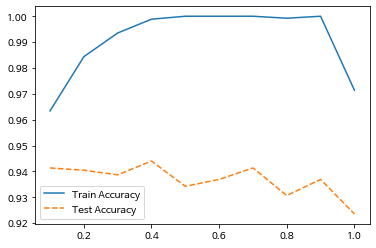

In [13]:
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [17]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = 0.1,n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["n_estimators"] = para_n_tree
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy
df_accuracy_depth.round(3)


,n_estimators,TrainScore,TestScore
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.940
7,80,0.960,0.940
8,90,0.961,0.940
9,100,0.963,0.941


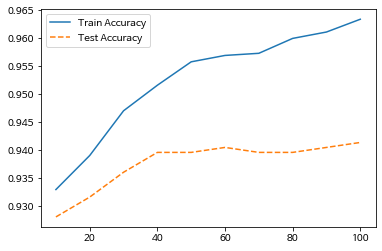

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [21]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234,n_estimators=100, learning_rate = 0.1, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy
df_accuracy_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.992,0.941
5,6,0.998,0.949
6,7,1.000,0.946
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


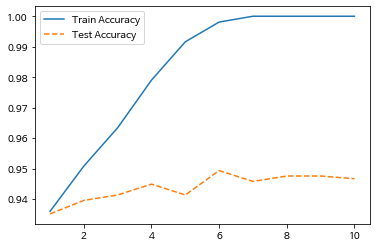

In [19]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [22]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234,n_estimators=100, max_depth = 4,
                                learning_rate = 0.1, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,10,0.977,0.945
1,20,0.976,0.942
2,30,0.974,0.942
3,40,0.973,0.937
4,50,0.969,0.941
5,60,0.973,0.941
6,70,0.969,0.943
7,80,0.968,0.943
8,90,0.966,0.941
9,100,0.963,0.940


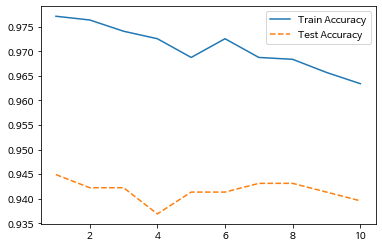

In [23]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [24]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf *10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators=100, 
                                    learning_rate=0.1, min_samples_leaf=v_min_samples_leaf,max_depth=4)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainScore"] = train_accuracy
df_accuracy_leaf["TestScore"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.977,0.946
1,20,0.970,0.942
2,30,0.970,0.942
3,40,0.963,0.940
4,50,0.960,0.942
5,60,0.958,0.939
6,70,0.958,0.937
7,80,0.955,0.940
8,90,0.950,0.936
9,100,0.948,0.938


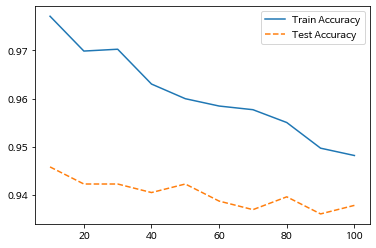

In [25]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [34]:
gb_final = GradientBoostingClassifier(random_state=1234, n_estimators=100, 
                                      min_samples_leaf=10, learning_rate=0.1, max_depth=4)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set :", gb_final.score(df_train_x, df_train_y))
print("Accuracy on test set :", gb_final.score(df_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))



Accuracy on training set : 0.9771254288982082
Accuracy on test set : 0.9457777777777778
Confusion matrix:
 [[1018    3]
 [  58   46]]


In [29]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '변수')

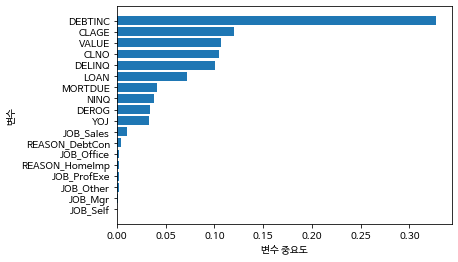

In [30]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [32]:
estimator = GradientBoostingClassifier()
param_grid = {"learning_rate":para_lr, "max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best model : ", grid_dt.best_estimator_)
print("best parameter: ", grid_dt.best_params_)
print("best score : ", grid_dt.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.30000000000000004, loss='deviance',
                           max_depth=8, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best parameter:  {'learning_rate': 0.30000000000000004, 'max_depth': 8, 'min_samples_leaf': 10}
best score :  0.949
